# Data Wrangling Project: WeRateDogs Datasets
### Gathering, Assessing, Cleaning and Analyzing (Visualisation)

## Step 1: Gathering Data

In [2]:
# import all libraries and packages needed for the project

import pandas as pd
import numpy as np
import requests
import json
import os
import re
from datetime import datetime

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# DataSet - 1
# load the first dataset titled twitter-archive-enhanced using pandas

twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# DataSet - 2
# download the second dataset titled image-predictions using requests library

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [6]:
# load the dataset titled image-predictions using pandas

image_prediction = pd.read_csv('image-predictions.tsv', '\t')

In [8]:
# DataSet - 3
# List of dictionaries to read tweet's JSON data line by line and later convert it to a dataframe.

df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_json_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [ ]:
data = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        f = json.loads(line)
        
        # Append to list of dictionaries
        data.append({'tweet_id': f['id'],
                        'retweet_count': f['retweet_count'],
                        'favorite_count': f['favorite_count']
                       })

df_data = pd.DataFrame(data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_data.head()

## Step 2: Assessing the gathered data

#### Twitter Archive Enhanced Dataset

In [10]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_enhanced.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,None,None,None,None
919,756526248105566208,NaN,NaN,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All hail sky doggo. 13/10 would jump super hig...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756526248...,13,10,None,doggo,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
412,822975315408461824,NaN,NaN,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,None,None,None,None


In [12]:
# checking for null values
twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
# Checking the missing values in expanded_url
twitter_enhanced[twitter_enhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [14]:
twitter_enhanced.loc[twitter_enhanced['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [15]:
# checking for duplicate rows
twitter_enhanced.duplicated().sum()

0

In [16]:
twitter_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
# Counting the values of source column
twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
# function to check for duplicated values in each row
def check_for_duplicates(dataset):
    for i in dataset:
        print(i, dataset[i].duplicated().sum())
    
check_for_duplicates(twitter_enhanced)

tweet_id 0
in_reply_to_status_id 2278
in_reply_to_user_id 2324
timestamp 0
source 2352
text 0
retweeted_status_id 2174
retweeted_status_user_id 2330
retweeted_status_timestamp 2174
expanded_urls 137
rating_numerator 2316
rating_denominator 2338
name 1399
doggo 2354
floofer 2354
pupper 2354
puppo 2354


In [19]:
# Checking name column that start without capital letter
twitter_enhanced[twitter_enhanced['name'].str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


#### Image Prediction Dataset

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# summary of data
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_prediction.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
710,685307451701334016,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,0.963176,True,Shetland_sheepdog,0.019468,True,keeshond,0.008605,True
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True


In [23]:
# checking for null values
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
# check for duplicated rows
image_prediction.duplicated().sum()

0

In [25]:
# checking for duplicates in each column
check_for_duplicates(image_prediction)

tweet_id 0
jpg_url 66
img_num 2071
p1 1697
p1_conf 69
p1_dog 2073
p2 1670
p2_conf 71
p2_dog 2073
p3 1667
p3_conf 69
p3_dog 2073


#### Tweets JSON Dataset

In [7]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        0 non-null      object
 1   retweet_count   0 non-null      object
 2   favorite_count  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [27]:
# assessing the dataset by printing out random samples
tweet_json_df.sample(4)

,tweet_id,retweet_count,favorite_count
1379,700890391244103680,653,2437
269,841314665196081154,5312,17305
644,793165685325201412,3238,10478
2037,671547767500775424,658,1444


In [28]:
# check for duplicated rows
tweet_json_df.duplicated().sum()

0

In [29]:
# check for duplicate values in each column
check_for_duplicates(tweet_json_df)

tweet_id 0
retweet_count 630
favorite_count 347


## Quality and Tideness Issues
* These issues were observed while assessing the datasets visually and programmatically

### DataSet 1: Twitter Enhanced Archive
#### Quality Issues
1. Missing values in 6 columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_enhanced, expanded_urls.

2. Inaccurate datatypes in Timestamp and Tweet_id column

3. Name column has inconsistent values such as a, an, quite, such. All starting with lowercase.

4. Denominator rating column having extremly high values greater than 10, further investigation shows the text column has float numbers which the ratings were obtained from.

5. Source alone needs to be extracted from the html tag in the source column.

### DataSet 2: Image Prediction
#### Quality Issues

6. Inaccurate datatype in Tweet_ID column.

7. Dropping p2_conf, p2, p3, p3_conf columns not needed for analysis


### DataSet 3: Tweet Json
#### Quality Issue
8. Inaccurate datatype: tweet_id datatype needs to be changed to string


#### Overall Tideness Issue

1. Floofer, Doggo, Puppo, Pupper columns needs to be in one column

2. The image_prediction and tweet_json dataframe should be merged to the twitter ehnanced archive dataframe.

3. Unequal number of rows across all three datasets. 
        Twiiter_Enhanced - 2356
        Image_prediction - 2075 
        Tweet_json - 2354

## Step 3: Cleaning the Data

In [30]:
# making a copy of each dataset before cleaning  in order to retain the original

enhanced_clean = twitter_enhanced.copy()
prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json_df.copy()

## Twitter Enhanced Dataset

### 1. Define
Missing values in 6 columns. 
* tweet_status_id: since only original tweets and not retweets are needed, there are about 181 retweet record, they will be dropped.
*  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_enhanced will be dropped since they won't be used for analysis
* Only original tweets with images is to be included the master dataset so tweets without expanded_url(having no images will be dropped)

### Code

In [31]:
# locating retweet rows and dropping them
enhanced_clean = enhanced_clean.loc[enhanced_clean['retweeted_status_id'].isnull()]

In [32]:
enhanced_clean.dropna(subset=['expanded_urls'], inplace=True)

In [33]:
# drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_enhanced columns

enhanced_clean = enhanced_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                              'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [34]:
enhanced_clean.reset_index(inplace=True, drop=True)

### Test

In [35]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 198.6+ KB


In [36]:
enhanced_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### 2. Define
* Change TimeStamp column datatype to datetime using .astype so that it can be used for further analysis.
* Change TweetID column datatype to string

### Code

In [37]:
# change timestamp datatype
enhanced_clean['timestamp'] = pd.to_datetime(enhanced_clean['timestamp'])

# change tweet_id datatype
enhanced_clean['tweet_id'] = enhanced_clean['tweet_id'].astype(str)

### Test

In [38]:
enhanced_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### 3. Define
* Replacing inconsistent names with None value. Inconsistent values such as a, an, quite, such. All starting with lowercase.

### Code

In [39]:
# change all lower case names to None
enhanced_clean.loc[enhanced_clean['name'] == enhanced_clean['name'].str.lower(), 'name'] = 'None'

### Test

In [40]:
# test 
enhanced_clean.name[0].islower()

False

### 4. Define
* Combining the floofer, doggo, puppo, pupper column to form on one column titled dog_stage

### Code

In [41]:
# Replace the None values in each column with an empty value 
enhanced_clean = enhanced_clean.replace({'floofer':{'None':''}, 'pupper':{'None':''}, 'doggo':{'None':''}, 'puppo':{'None':''}})

In [42]:
# add floofer, doggo, puppo, pupper columns together to form a new column
enhanced_clean['stage'] = enhanced_clean.floofer + enhanced_clean.pupper + enhanced_clean.doggo + enhanced_clean.puppo

In [43]:
enhanced_clean['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'flooferdoggo', 'pupperdoggo'], dtype=object)

In [44]:
# replacing the incorrect dog stage name with the right one

enhanced_clean['stage'].replace('doggopuppo', 'puppo', inplace=True)
enhanced_clean['stage'].replace('flooferdoggo', 'floofer', inplace=True)


In [45]:
# From the text below, the dog stage is floofer
enhanced_clean.query('stage == "pupperdoggo"').index

Int64Index([360, 418, 443, 449, 539, 564, 691, 750, 852, 901], dtype='int64')

In [46]:
# correcting dog_stage name by index
enhanced_clean.loc[539, ['stage']] =  "doggo"

In [47]:
# correcting dog_stage name by index
enhanced_clean.loc[360, ['stage']] =  "doggo"

In [48]:
# correcting dog_stage name by index
enhanced_clean.loc[449, ['stage']] =  "pupper"

In [49]:
enhanced_clean['stage'] = enhanced_clean.stage.replace(to_replace='pupperdoggo',value='pupper_doggo')

In [50]:
# replacing the '' value with nan value

enhanced_clean.loc[enhanced_clean.stage == "", 'stage'] = np.nan

In [51]:
# drop the columns from the dataframe
enhanced_clean.drop(columns=['floofer', 'doggo', 'pupper', 'puppo'], axis = 1, inplace = True)

### Test

In [52]:
enhanced_clean.stage.value_counts()

pupper          223
doggo            74
puppo            24
floofer          10
pupper_doggo      7
Name: stage, dtype: int64

In [53]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   stage               338 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 149.0+ KB


### 5. Define
* Denominator rating column having extremly high values greater than 10. This rows will be assessed and cleaned one by one with the right values. Extremely high values will be replaced with 10

### Code

In [54]:
enhanced_clean.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
341,The floofs have been released I repeat the flo...,84,70
405,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
702,Why does this never happen at my front door......,165,150
857,"After so many requests, this is Bretagne. She ...",9,11
908,Say hello to this unbelievably well behaved sq...,204,170
953,Happy 4/20 from the squad! 13/10 for all https...,4,20
990,This is Bluebert. He just saw that both #Final...,50,50
1016,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1041,Here's a brigade of puppers. All look very pre...,80,80
1061,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [55]:
# replacing the incorrect ratings with the correct ratings gotten from the text column

enhanced_clean.loc[857, ['rating_numerator', 'rating_denominator']] =  [14, 10]
enhanced_clean.loc[953, ['rating_numerator', 'rating_denominator']] =  [13, 10]
enhanced_clean.loc[990, ['rating_numerator', 'rating_denominator']] =  [11, 10]
enhanced_clean.loc[1438, ['rating_numerator', 'rating_denominator']] =  [10, 10]
enhanced_clean.loc[2096, ['rating_numerator', 'rating_denominator']] =  [9, 10]

In [56]:
# Contains video so it would be dropped
enhanced_clean.drop([702], inplace=True)

In [57]:
# replacing the rating_denomiator greater than 10 with 10
enhanced_clean.loc[enhanced_clean.rating_denominator != 10, 'rating_denominator'] = 10

### Test

In [58]:
enhanced_clean.loc[enhanced_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


* From the test code, every denominator is 10

### 6. Define
* Correcting rating numerator with float with numbers with appropraite number.

### Code

In [59]:
# numerator value is 9.75 from text column, rounding up to 10
enhanced_clean.loc[531, ['rating_numerator']] = 10

# numerator value is 11.27 from text column, rounding up to 12
enhanced_clean.loc[588, ['rating_numerator']] = 12

### Test

In [60]:
enhanced_clean.rating_numerator.loc[531]

10

In [61]:
enhanced_clean.rating_numerator.loc[588]

12

* The test returns an empty dataframe because no rating above 16 can be found

In [62]:
enhanced_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1723,673612854080196609,2015-12-06 21:19:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,pupper
1698,674038233588723717,2015-12-08 01:30:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaiya. She's an aspiring shoe model. 1...,https://twitter.com/dog_rates/status/674038233...,12,10,Kaiya,pupper
877,737800304142471168,2016-06-01 00:17:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,NaN


### 7. Define
* Replacing the texts in the source column with appropraite words. Removing all tags.

### Code

In [63]:
# cleaning the source column

enhanced_clean.loc[enhanced_clean.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = "Twitter for iPhone"

enhanced_clean.loc[enhanced_clean.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'source'] = "Vine - Make a Scene"

enhanced_clean.loc[enhanced_clean.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = "Twitter Web Client"

enhanced_clean.loc[enhanced_clean.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = "TweetDeck"   

In [64]:
# Set datatype to category

enhanced_clean['source'] = enhanced_clean.source.astype('category')

### Test

In [65]:
enhanced_clean.source.value_counts()

Twitter for iPhone     1984
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [66]:
enhanced_clean.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
, ordered=False)

## Image Prediction DataSet

### 8. Define
* Change Tweet_id datatype from integer to string using astype method.

### Code

In [67]:
prediction_clean['tweet_id'] = prediction_clean['tweet_id'].astype(str)

### Test

In [68]:
prediction_clean.tweet_id.dtype

dtype('O')

## Tweet Json DataSet

### 9. Define
* change tweet_id datatype to string using astype method.

### Code

In [69]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(str)

### Test

In [70]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tideness Issue

* Merging all datasets together

In [71]:
# Merge DataSet 
merged_data = pd.merge(enhanced_clean, prediction_clean, on='tweet_id', how='left')

In [72]:
merged_data = pd.merge(merged_data, tweet_json_clean, on='tweet_id', how='left')

### Assessing Merged Dataset

In [73]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2116 non-null   object             
 1   timestamp           2116 non-null   datetime64[ns, UTC]
 2   source              2116 non-null   category           
 3   text                2116 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2116 non-null   int64              
 6   rating_denominator  2116 non-null   int64              
 7   name                2116 non-null   object             
 8   stage               338 non-null    object             
 9   jpg_url             1993 non-null   object             
 10  img_num             1993 non-null   float64            
 11  p1                  1993 non-null   object             
 12  p1_conf             1993 non-null 

In [74]:
merged_data.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
507,790946055508652032,2016-10-25 16:00:09+00:00,Twitter for iPhone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,...,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,5496,18601
422,807010152071229440,2016-12-08 23:53:08+00:00,Twitter for iPhone,This is Lennon. He's a Boopershnoop Pupperdoop...,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,NaN,https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg,...,0.610807,True,Irish_setter,0.213642,True,Welsh_springer_spaniel,0.031887,True,4418,14514
1466,681297372102656000,2015-12-28 02:15:26+00:00,Twitter for iPhone,This is actually a lion. We only rate dogs. Fo...,https://twitter.com/dog_rates/status/681297372...,12,10,None,NaN,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,...,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True,1091,3490
169,852553447878664193,2017-04-13 16:05:56+00:00,Twitter for iPhone,This is Jarod. He likes having his belly brush...,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,NaN,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,...,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True,3885,17492
1192,699072405256409088,2016-02-15 03:27:04+00:00,Twitter for iPhone,ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,https://twitter.com/dog_rates/status/699072405...,12,10,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/69907...,...,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True,1325,3296


### Cleaning Merged Dataset

* Dropping columns not needed in the final dataset
* Renaming columns
* Dropping missing rows

In [75]:
merged_data.drop(columns=['p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [76]:
# renaming p1, p1_conf, and p1_dog to an understandable name
merged_data.rename(columns = {"p1":"dog_breed_prediction", "p1_conf":"confidence_percent", "p1_dog":"is_image_a_dog"}, inplace=True)

In [77]:
# Test
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2116 non-null   object             
 1   timestamp             2116 non-null   datetime64[ns, UTC]
 2   source                2116 non-null   category           
 3   text                  2116 non-null   object             
 4   expanded_urls         2116 non-null   object             
 5   rating_numerator      2116 non-null   int64              
 6   rating_denominator    2116 non-null   int64              
 7   name                  2116 non-null   object             
 8   stage                 338 non-null    object             
 9   jpg_url               1993 non-null   object             
 10  img_num               1993 non-null   float64            
 11  dog_breed_prediction  1993 non-null   object             
 12  confid

In [78]:
# drop rows where missing values are present
merged_data.dropna(subset=['is_image_a_dog'], inplace=True)

In [79]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2115
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1993 non-null   object             
 1   timestamp             1993 non-null   datetime64[ns, UTC]
 2   source                1993 non-null   category           
 3   text                  1993 non-null   object             
 4   expanded_urls         1993 non-null   object             
 5   rating_numerator      1993 non-null   int64              
 6   rating_denominator    1993 non-null   int64              
 7   name                  1993 non-null   object             
 8   stage                 306 non-null    object             
 9   jpg_url               1993 non-null   object             
 10  img_num               1993 non-null   float64            
 11  dog_breed_prediction  1993 non-null   object             
 12  confid

## Step 4: Storing Data

In [80]:
merged_data.to_csv('twitter_archive_master.csv', index=False)

## Step 5: Analyzing and Visualizing Data

### Analyzing Data

In [81]:
# group retweet_count by year
merged_data.groupby(merged_data.timestamp.dt.year)['retweet_count'].sum()

timestamp
2015     717854
2016    2657954
2017    2138559
Name: retweet_count, dtype: int64

**Year 2016 recorded the highest number of retweet of WeRateDog tweets.**

In [82]:
# get the tweet with the highest retweet count
merged_data[merged_data.retweet_count == merged_data.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_breed_prediction,confidence_percent,is_image_a_dog,retweet_count,favorite_count
828,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,True,79515,131075


**Labrador Retriever with rating 13/10 had the highest number of retweet count.This tweet was posted on 18 June 2016.**

In [87]:
# Count of Dogs with ratings higher than 10

higher_ratings = merged_data.query('rating_numerator > 10').count()
print(higher_ratings['rating_numerator'], 'dogs had ratings greater than 10')

1161 dogs had ratings greater than 10


In [90]:
# Dog with the highest rating

merged_data[merged_data.rating_numerator == merged_data.rating_numerator.max()]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_breed_prediction,confidence_percent,is_image_a_dog,retweet_count,favorite_count
771,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow_tie,0.533941,False,2772,5569


**A dog named Atticus had the highest rating of 1776. This is actually a dog wearing a bow tie but it was classified as a bow_tie**

In [84]:
# dog stage 
merged_data.stage.value_counts()

pupper          204
doggo            65
puppo            23
floofer           8
pupper_doggo      6
Name: stage, dtype: int64

**More dogs are seen to belong to the pupper dog stage category.**

In [85]:
# Sources of posting tweet
merged_data.source.value_counts()

Twitter for iPhone     1954
Twitter Web Client       28
TweetDeck                11
Vine - Make a Scene       0
Name: source, dtype: int64

**Twitter for iPhone is the most commonly source used for posting the tweet**

### Visualizing Data

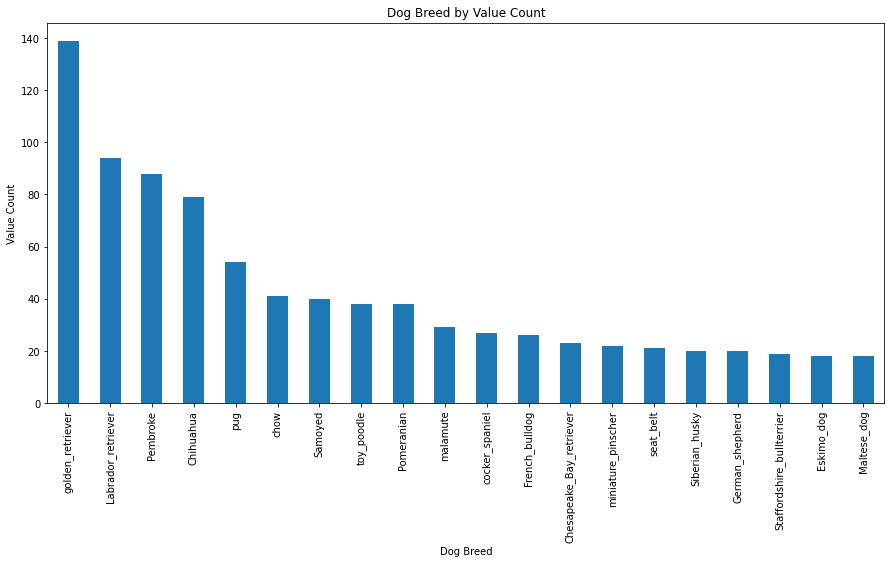

In [86]:
# shows the first highest 20 dog breed in the dataset

merged_data['dog_breed_prediction'].value_counts()[:20].plot(kind='bar', figsize=(15,7));
plt.xlabel("Dog Breed");
plt.ylabel("Value Count");
plt.title("Dog Breed by Value Count");

### Insight drawn

**Golden Retriever dog breed had the highest count in the dataset followed by Labrador_retriever. After prediction, about 139 images belonged to the golden_retriever dog breed.**

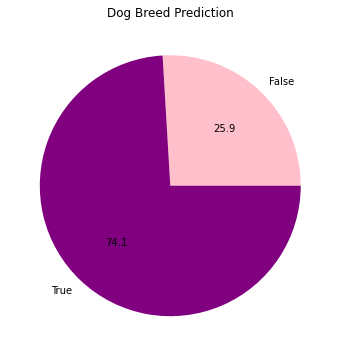

In [775]:
# plot to show the percentage of images that are dogs to images that are not dogs

merged_data.groupby('is_image_a_dog').size().plot(kind='pie', autopct='%.1f',colors = ['pink', 'purple'], 
                                  title='Dog Breed Prediction', figsize=(6, 6));
plt.ylabel("");

### Insight drawn

**74.1% of the dog breed prediction were actually dogs while 25.9% images were not dogs.**

In [688]:
merged_data.groupby(merged_data.timestamp.dt.month)['favorite_count'].sum()

timestamp
1     1971580
2     1672341
3     1535756
4     1190746
5     1572257
6     2042654
7     2167249
8      681425
9      720435
10     864121
11    1148143
12    2166054
Name: favorite_count, dtype: int64

In [742]:
merged_data.groupby(merged_data.timestamp.dt.month)['retweet_count'].sum()

timestamp
1     679294
2     460559
3     429191
4     322952
5     441832
6     618882
7     552483
8     232007
9     232299
10    277828
11    417626
12    849414
Name: retweet_count, dtype: int64

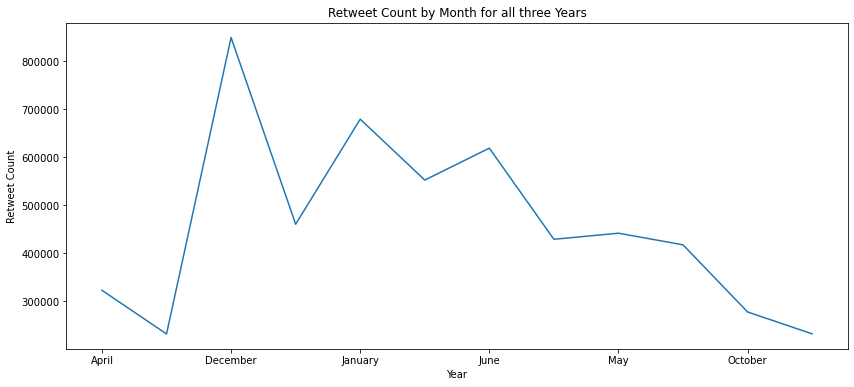

In [776]:
merged_data.groupby(merged_data.timestamp.dt.month_name())['retweet_count'].sum().plot(kind='line', figsize=(14,6));
plt.xlabel("Year");
plt.ylabel("Retweet Count");
plt.title("Retweet Count by Month for all three Years");
plt.show()

**December, January, June had a cummulative retweet count greater than 600000.**

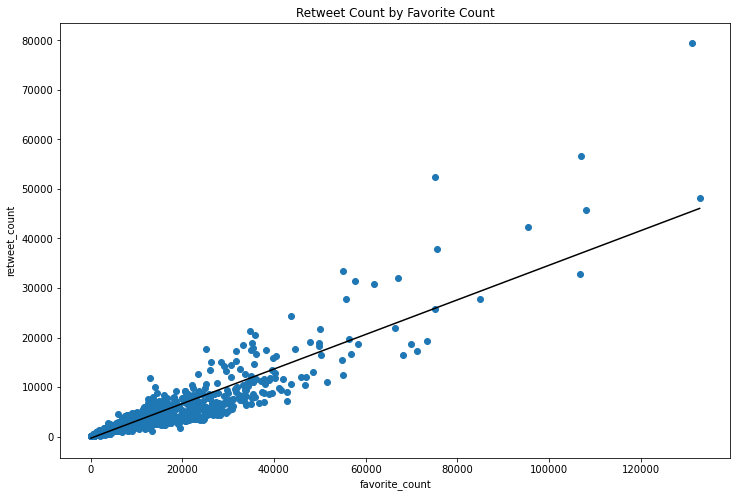

In [91]:
# plot to show the correlation between favorite_count and retweet_count

plt.figure(figsize=(12,8))
plt.scatter(merged_data['favorite_count'], merged_data['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel("retweet_count")
plt.title('Retweet Count by Favorite Count')

plt.plot(np.unique(merged_data['favorite_count']), np.poly1d(np.polyfit(merged_data['favorite_count'], merged_data['retweet_count'], 1))
         (np.unique(merged_data['favorite_count'])), color='black');

**A strong positive correlation exists between retweet_count and favorite_count.**